# Código do trabalho 4 de Aprendizado de Máquina - parte 2

## Carga e preparação dos dados

In [1]:
# Bibliotecas
import numpy as np
import h5py
import os 
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import confusion_matrix


In [2]:
# Diretório raiz. Apontar para o local onde estão os arquivos de dados
os.chdir('/srv/ML2018/T4-2018')

In [3]:
# Função que lê os dados nos arquivos fornecidos.
def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5','r')
    train_set_x_orig = np.array(train_dataset["train_set_x"][ : ])   # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][ : ])   # your train set labels
    
    test_dataset = h5py.File("test_catvnoncat.h5","r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][ : ])      # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][ : ])      # your test set labels
    
    classes = np.array(test_dataset["list_classes"][:])              # the list of classes 
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return(train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes)
    

In [4]:
# Carregar as imagens nos conjuntos de treinamento e teste
train_x, train_y, test_x, test_y, classes = load_dataset()


In [5]:
# Dimensões das imagens
print(np.shape(train_x))

(209, 64, 64, 3)


[0]


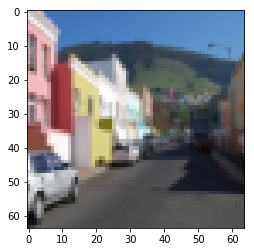

In [6]:
# Visualizar amostra de imagens
plt.imshow(train_x[1])
print(train_y[:,1])

In [7]:
# Obter dimensões
train_x_shape = np.shape(train_x)
test_x_shape = np.shape(test_x)
ntrain = train_x_shape[0]
ntest = test_x_shape[0]
nrows = train_x_shape[1]
ncols = train_x_shape[2]
nchannels = train_x_shape[3]
print("Imagens (n train): ",ntrain)
print("largura: ",nrows)
print("altura: ",ncols)
print("canais: ",nchannels)
print("Imagens (n test): ",ntest)


Imagens (n train):  209
largura:  64
altura:  64
canais:  3
Imagens (n test):  50


In [8]:
# Normalização 
train_x = train_x / 255
test_x = test_x / 255


## Primeira parte: Treinar uma rede completamente conectada de uma única camada oculta e com uma camada de saı́da de duas unidades com softmax

In [9]:
# Reformatar os dados (reshape)
train_x_flat = train_x.flatten().reshape(ntrain, nrows * ncols * nchannels)
test_x_flat = test_x.flatten().reshape(ntest, nrows * ncols * nchannels)
train_y_cat = keras.utils.to_categorical(train_y[0], 2)
test_y_cat = keras.utils.to_categorical(test_y[0], 2)

In [10]:
# Verificar dimensões
print("classes: ", len(classes))
print("train_x_flat: ",np.shape(train_x_flat))
print("test_x_flat: ",np.shape(test_x_flat))
print("train_y_cat: ",np.shape(train_y_cat))
print("test_y_cat: ",np.shape(test_y_cat))


classes:  2
train_x_flat:  (209, 12288)
test_x_flat:  (50, 12288)
train_y_cat:  (209, 2)
test_y_cat:  (50, 2)


In [11]:
# Definir o modelo
model = keras.Sequential()

# Camada Fully Connected
model.add(keras.layers.Dense(128, input_shape = (nrows*ncols*nchannels, ), activation='relu'))

# Softmax com duas saídas:
model.add(keras.layers.Dense(2, activation='softmax'))

In [12]:
# Configurar o método de aprendizado

#model.compile(optimizer=tf.train.RMSPropOptimizer(0.001), loss='binary_crossentropy', metrics=['binary_accuracy'])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [13]:
# Ajustar o modelo

model.fit(train_x_flat, train_y_cat, epochs=30, validation_data=(test_x_flat, test_y_cat))


Train on 209 samples, validate on 50 samples
Epoch 1/30
209/209 [==============================]209/209 [==============================] - 1s 5ms/step - loss: 3.7179 - acc: 0.6459 - val_loss: 1.6304 - val_acc: 0.6600

Epoch 2/30
209/209 [==============================]209/209 [==============================] - 0s 1ms/step - loss: 1.9502 - acc: 0.5933 - val_loss: 0.4848 - val_acc: 0.7600

Epoch 3/30
209/209 [==============================]209/209 [==============================] - 0s 1ms/step - loss: 0.8061 - acc: 0.6364 - val_loss: 0.6514 - val_acc: 0.7400

Epoch 4/30
209/209 [==============================]209/209 [==============================] - 0s 1ms/step - loss: 0.8865 - acc: 0.6364 - val_loss: 0.6523 - val_acc: 0.7400

Epoch 5/30
209/209 [==============================]209/209 [==============================] - 0s 1ms/step - loss: 1.1083 - acc: 0.6364 - val_loss: 0.7017 - val_acc: 0.5200

Epoch 6/30
209/209 [==============================]209/209 [==============================

In [14]:
# Avaliar o modelo

result = model.predict(test_x_flat)


In [15]:
# Teste de acurácia / Confusion Matrix
# Conjunto de Teste

y_true = test_y[0,:]
y_test = np.round(result[:,1])
cm = confusion_matrix(y_true, y_test)
print(cm)
acc = (cm[0,0] + cm[1,1]) / np.sum(cm)
print("Acurácia: ",acc)

[[14  3]
 [17 16]]
Acurácia:  0.6


## Segunda parte: Treinar uma rede convolucional.

In [16]:
# Definir o modelo
model = keras.Sequential()

# Camada Convolucional
model.add(keras.layers.Conv2D(64, (3,3), input_shape=(nrows, ncols, nchannels), 
                              use_bias=True, activation='relu'))
# Max pooling
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

# Camada Convolucional
model.add(keras.layers.Conv2D(32, (3,3), input_shape=(nrows, ncols, nchannels), 
                              use_bias=True, activation='relu'))
# Max pooling
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

# Camada "flattening"
model.add(keras.layers.Flatten())

# Camada Fully Connected
model.add(keras.layers.Dense(128, activation='relu'))

# Softmax com duas saídas:
model.add(keras.layers.Dense(2, activation='softmax'))


In [17]:
# Configurar o método de aprendizado

#rms = keras.optimizers.RMSprop(lr=0.0001)
#model.compile(loss='binary_crossentropy', optimizer=rms, metrics=['binary_accuracy'])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()
model.fit(train_x, train_y_cat, epochs=30)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 258       
Total para

In [19]:
# Executa predições com os exemplos do conjunto de teste
result = model.predict(test_x)

In [20]:
# Teste de acurácia / Confusion Matrix
# Conjunto de Teste

y_true = test_y[0,:]
y_test = np.round(result[:,1])
cm = confusion_matrix(y_true, y_test)
print(cm)
acc = (cm[0,0] + cm[1,1]) / np.sum(cm)
print("Acurácia: ",acc)

[[12  5]
 [ 4 29]]
Acurácia:  0.82


## Classificação das imagens

Informar o número de uma imagem e executar o código na célula abaixo:

AxesImage(54,36;334.8x217.44)
Cat:  0 %   Non cat:  100 %


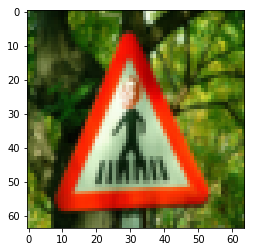

In [27]:
imagem = 14
test = plt.imshow(test_x[imagem])
print(test)
print("Cat: ",int(result[imagem,1]*100),"%   Non cat: ", int(result[imagem,0]*100),"%" )
